In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [9]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [10]:
len(X_train)

60000

In [11]:
len(X_test)

10000

In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

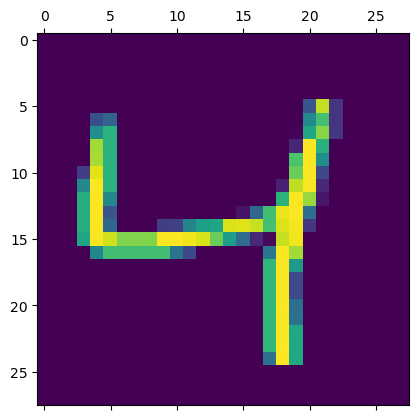

In [15]:
plt.matshow(X_train[2])

In [17]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [28]:
X_train = X_train / 255
X_test = X_test / 255

In [29]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [30]:
X_train_flattened.shape

(60000, 784)

In [31]:
X_test_flattened.shape

(10000, 784)

In [32]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [33]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 861us/step - loss: 0.4710 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3039 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 2s 876us/step - loss: 0.2833 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 2s 891us/step - loss: 0.2728 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 2s 843us/step - loss: 0.2665 - accuracy: 0.9261


In [34]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 754us/step - loss: 0.2714 - accuracy: 0.9255


[0.27137723565101624, 0.9254999756813049]

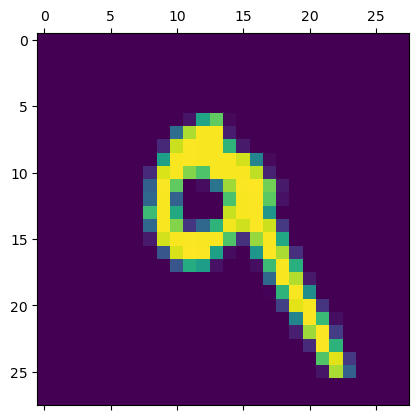

In [39]:
#SAMPLE PREDICTIONS

plt.matshow(X_test[7])

In [37]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 601us/step


array([1.9145101e-02, 1.6478853e-07, 7.8651249e-02, 9.3842310e-01,
       3.1573216e-03, 7.1488194e-02, 1.2631741e-06, 9.9971431e-01,
       9.3889460e-02, 6.3443518e-01], dtype=float32)

In [40]:
np.argmax(y_predicted[7])

9

In [41]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [42]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [45]:
Cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
Cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    4,    6,    2,    1,    1],
       [   0, 1105,    3,    2,    1,    1,    4,    2,   17,    0],
       [   4,    6,  927,   17,   12,    2,   13,    9,   38,    4],
       [   4,    0,   17,  930,    1,   15,    2,    9,   24,    8],
       [   1,    1,    2,    1,  932,    0,    9,    3,    8,   25],
       [  10,    2,    4,   47,   15,  739,   17,    9,   43,    6],
       [  11,    3,    8,    1,    9,    6,  914,    2,    4,    0],
       [   1,    5,   24,    6,   10,    0,    0,  945,    2,   35],
       [   5,    4,    6,   18,    9,   16,    9,   11,  889,    7],
       [   9,    5,    2,   11,   42,    4,    0,   15,   10,  911]])>

Text(95.72222222222221, 0.5, 'Truth')

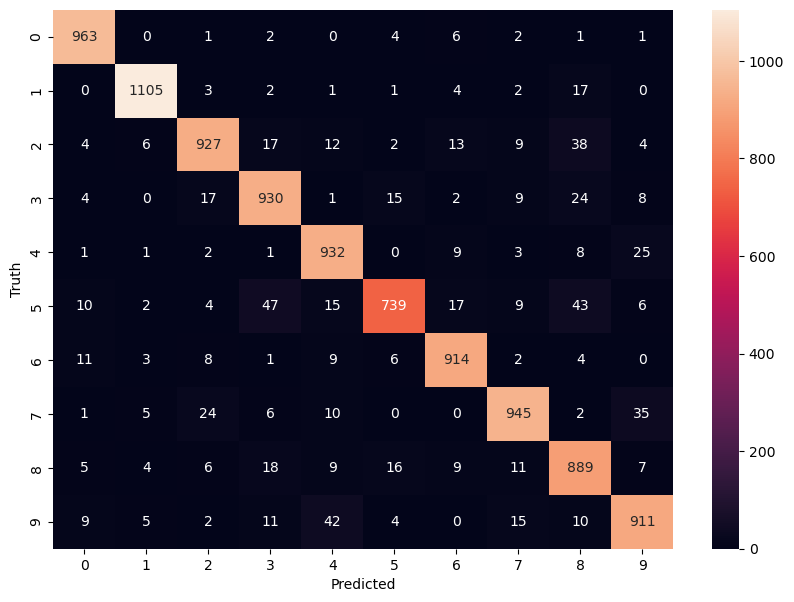

In [47]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(Cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2733 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1219 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0830 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0650 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0510 - accuracy: 0.9844


In [49]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 924us/step - loss: 0.0766 - accuracy: 0.9771


[0.07660898566246033, 0.9771000146865845]